# 1. Importing Libraries

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import warnings
warnings.filterwarnings("ignore")

# 2. Loading the data

In [2]:
# load the json file
with open('ultimate_data_challenge.json') as f:
    d = json.load(f)
    print(d)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [3]:
# transfer to pandas dataframe
tourist = pd.DataFrame(d)
tourist.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [4]:
# load the json file
with open('logins.json') as file:
    D = json.load(file)
# transfer to pandas dataframe
log_time=pd.DataFrame(D)
log_time.head()    

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
# transfer to pandas dataframe
log_time=pd.DataFrame(D)
log_time.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


# 3. Data Wrangling & Exploratory Data Analysis And Visualization

## Part One

In [6]:
log_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [7]:
# transform the object to datetime frame
log_time['login_time']=pd.to_datetime(log_time['login_time'])

In [8]:
log_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [9]:
log_time.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [10]:
log_time_new=log_time.set_index('login_time')
log_time_new.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [11]:
log_time_new['count'] = 1
log_time_new.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [12]:
log_time_new.sort_index(inplace=True)
log_time_new.head()

,count
login_time,
1970-01-01 20:12:16,1
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:36,1
1970-01-01 20:16:37,1


In [13]:
# Aggregate the login counts based on 30 minutes intervals
log_time_new = log_time_new.resample("30min").sum()
log_time_new.head()

,count
login_time,
1970-01-01 20:00:00,8
1970-01-01 20:30:00,16
1970-01-01 21:00:00,5
1970-01-01 21:30:00,4
1970-01-01 22:00:00,17


In [14]:
#log_time=log_time.resample(rule='H').last()
#log_time.head()

In [15]:
log_time_new.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4894 entries, 1970-01-01 20:00:00 to 1970-04-13 18:30:00
Freq: 30T
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   4894 non-null   int64
dtypes: int64(1)
memory usage: 76.5 KB


<Axes: xlabel='login_time'>

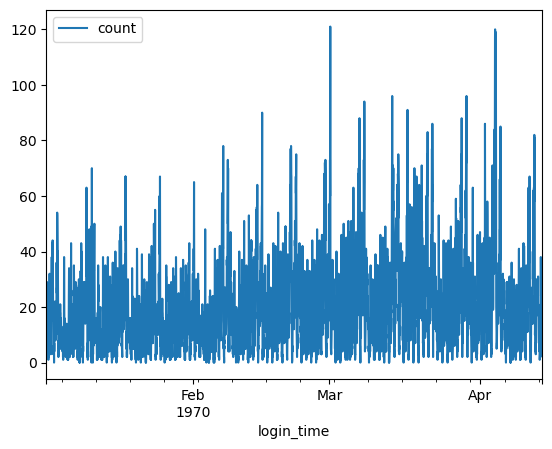

In [16]:
log_time_new.plot()

In [17]:
#It is hard to see much from this graph, We will try smoothing the window.

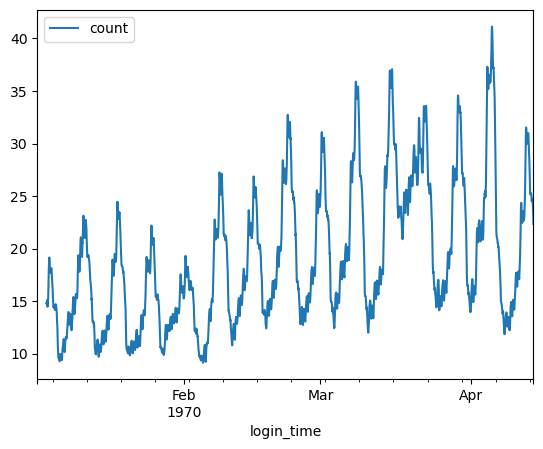

In [18]:
log_time_new.rolling(window=90).mean().plot()
plt.show()

In [19]:
## Looks more clearer. We will slice one month to check

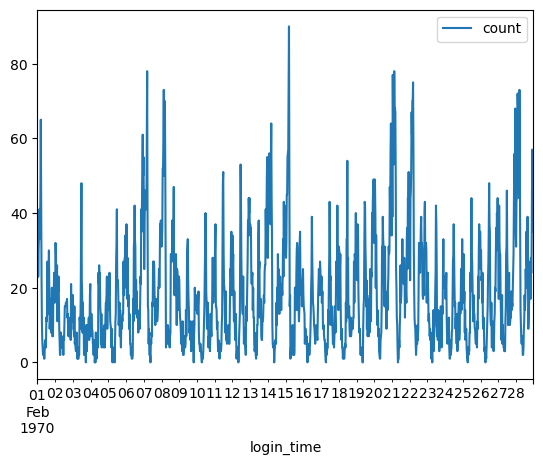

In [20]:
log_time_new.loc['1970-02'].plot()
plt.show()

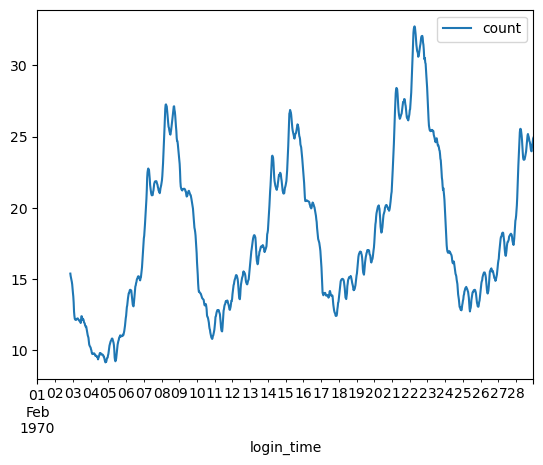

In [21]:
log_time_new.loc['1970-02'].rolling(window=90).mean().plot()
plt.show()

In [22]:
datetime.datetime(1970,1,6).weekday()

1

In [23]:
datetime.datetime(1970,1,11).weekday()

6

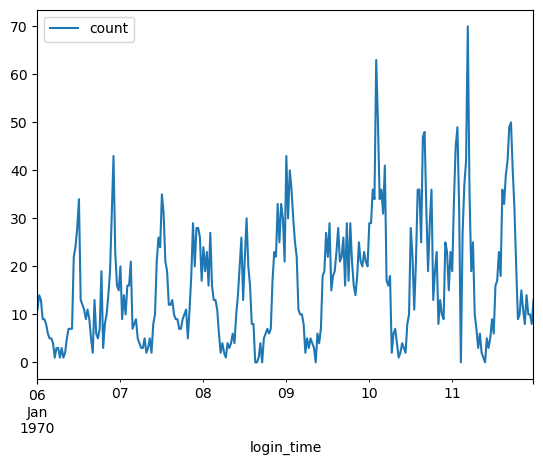

In [24]:
# We will plot the whole week
log_time_new.loc['1970-01-06':'1970-01-11'].plot()
plt.show()

In [25]:
#It seems like the use increases at the weekend. we will use a better gragh to check.

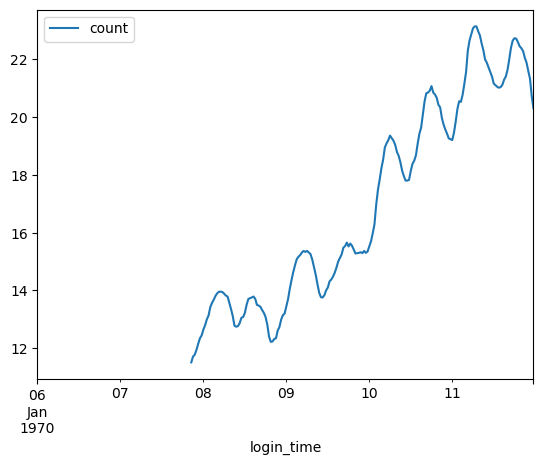

In [26]:
log_time_new.loc['1970-01-06':'1970-01-11'].rolling(window=90).mean().plot()
plt.show()

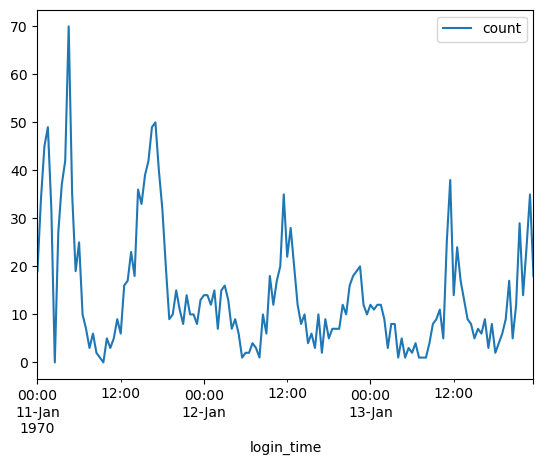

In [27]:
# Let's plot one weekend to check the demand
log_time_new.loc['1970-01-11':'1970-01-13'].plot()
plt.show()

In [28]:
# It looks like the demand is greatest around midnight on the weekends.

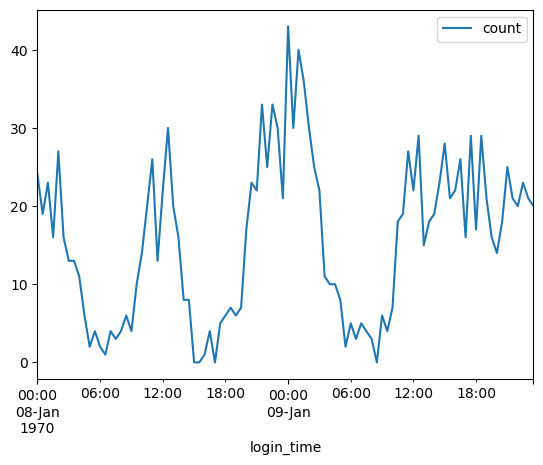

In [29]:
# We will check two weekdays
log_time_new.loc['1970-01-08':'1970-01-09'].plot()
plt.show()

In [30]:
#So we can reach two conclusions:
#1.Demand is greater on the weekends than during the week.
#2.Demand is greatest around midnight and noon for both weekdays and weekends.

## Part Two

In [31]:
tourist.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [32]:
# check the last five rows
tourist.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
49995,King's Landing,0,2014-01-25,5.0,1.0,2014-06-05,iPhone,0.0,False,100.0,5.63,4.2
49996,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,iPhone,0.0,False,0.0,0.00,4.0
49997,Winterfell,0,2014-01-31,5.0,1.0,2014-05-22,Android,0.0,True,100.0,3.86,5.0
49998,Astapor,2,2014-01-14,3.0,1.0,2014-01-15,iPhone,0.0,False,100.0,4.58,3.5
49999,Astapor,0,2014-01-18,NaN,1.0,2014-04-20,Android,0.0,False,0.0,3.49,5.0


In [33]:
# check the data information
tourist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [34]:
# check how many columns and rows
tourist.shape

(50000, 12)

In [35]:
# check missing values
tourist.isnull().sum()

city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64

In [36]:
# check if there are any duplicated values
tourist.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
49995    False
49996    False
49997    False
49998    False
49999    False
Length: 50000, dtype: bool

In [37]:
tourist.last_trip_date

0        2014-06-17
1        2014-05-05
2        2014-01-07
3        2014-06-29
4        2014-03-15
            ...    
49995    2014-06-05
49996    2014-01-25
49997    2014-05-22
49998    2014-01-15
49999    2014-04-20
Name: last_trip_date, Length: 50000, dtype: object

In [38]:
tourist=tourist.sort_values(by='last_trip_date')
tourist.head(30)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
31425,Winterfell,1,2014-01-01,NaN,1.00,2014-01-01,iPhone,0.0,False,100.0,4.31,5.0
10729,Winterfell,1,2014-01-01,3.0,1.00,2014-01-01,iPhone,0.0,False,100.0,19.67,5.0
40336,Winterfell,1,2014-01-01,5.0,1.00,2014-01-01,iPhone,0.0,False,100.0,5.98,5.0
34828,Astapor,1,2014-01-01,5.0,1.25,2014-01-01,iPhone,100.0,False,100.0,2.45,5.0
37295,Winterfell,1,2014-01-01,3.0,1.00,2014-01-01,iPhone,0.0,False,100.0,0.77,5.0
9941,Winterfell,1,2014-01-01,NaN,2.00,2014-01-01,Android,100.0,False,100.0,1.61,5.0
13542,Winterfell,1,2014-01-01,NaN,1.50,2014-01-01,iPhone,100.0,False,100.0,3.08,5.0
39857,Winterfell,1,2014-01-01,5.0,1.00,2014-01-01,iPhone,0.0,False,100.0,9.97,5.0
19976,Winterfell,1,2014-01-01,5.0,1.00,2014-01-01,iPhone,0.0,False,100.0,4.74,5.0
48271,Winterfell,1,2014-01-01,NaN,1.00,2014-01-01,iPhone,0.0,True,100.0,8.05,5.0


In [39]:
tourist.tail()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
45126,Winterfell,1,2014-01-10,4.6,1.02,2014-07-01,Android,6.3,False,56.3,6.13,4.6
38651,King's Landing,0,2014-01-13,4.9,1.00,2014-07-01,iPhone,0.0,True,92.3,10.19,5.0
14473,King's Landing,0,2014-01-02,5.0,1.00,2014-07-01,Android,0.0,False,100.0,5.06,5.0
22735,Winterfell,0,2014-01-08,5.0,1.00,2014-07-01,iPhone,0.0,True,75.0,8.71,5.0
45357,Astapor,5,2014-01-28,4.4,1.02,2014-07-01,iPhone,1.4,False,76.4,3.90,4.9


In [40]:
tourist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 31425 to 45357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.6+ MB


In [41]:
tourist[['signup_date', 'last_trip_date']]=tourist[['signup_date', 'last_trip_date']].apply(pd.to_datetime)
tourist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 31425 to 45357
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6),

In [42]:
tourist['last_trip_date'].describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

In [43]:
## Here we can see the user who is retained. It means who is active in June.

In [44]:
## So we will create a column 'retain' based on our finding. It will be our target column/variable for the modelling.

In [45]:
tourist['retain'] = (tourist.last_trip_date >= '2014-06-01')*1
tourist.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retain
31425,Winterfell,1,2014-01-01,NaN,1.00,2014-01-01,iPhone,0.0,False,100.0,4.31,5.0,0
10729,Winterfell,1,2014-01-01,3.0,1.00,2014-01-01,iPhone,0.0,False,100.0,19.67,5.0,0
40336,Winterfell,1,2014-01-01,5.0,1.00,2014-01-01,iPhone,0.0,False,100.0,5.98,5.0,0
34828,Astapor,1,2014-01-01,5.0,1.25,2014-01-01,iPhone,100.0,False,100.0,2.45,5.0,0
37295,Winterfell,1,2014-01-01,3.0,1.00,2014-01-01,iPhone,0.0,False,100.0,0.77,5.0,0


In [46]:
tourist.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 31425 to 45357
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  retain                  50000 non-null  in

In [47]:
categorical_features=['city','phone','ultimate_black_user']
tourist = pd.get_dummies(tourist, columns=categorical_features)
tourist.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,retain,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
31425,1,2014-01-01,NaN,1.00,2014-01-01,0.0,100.0,4.31,5.0,0,0,0,1,0,1,1,0
10729,1,2014-01-01,3.0,1.00,2014-01-01,0.0,100.0,19.67,5.0,0,0,0,1,0,1,1,0
40336,1,2014-01-01,5.0,1.00,2014-01-01,0.0,100.0,5.98,5.0,0,0,0,1,0,1,1,0
34828,1,2014-01-01,5.0,1.25,2014-01-01,100.0,100.0,2.45,5.0,0,1,0,0,0,1,1,0
37295,1,2014-01-01,3.0,1.00,2014-01-01,0.0,100.0,0.77,5.0,0,0,0,1,0,1,1,0


In [48]:
tourist.isnull().any()

trips_in_first_30_days       False
signup_date                  False
avg_rating_of_driver          True
avg_surge                    False
last_trip_date               False
surge_pct                    False
weekday_pct                  False
avg_dist                     False
avg_rating_by_driver          True
retain                       False
city_Astapor                 False
city_King's Landing          False
city_Winterfell              False
phone_Android                False
phone_iPhone                 False
ultimate_black_user_False    False
ultimate_black_user_True     False
dtype: bool

In [49]:
tourist['avg_rating_of_driver'].fillna(tourist['avg_rating_of_driver'].mean(), inplace=True)

In [50]:
tourist['avg_rating_by_driver'].fillna(tourist['avg_rating_by_driver'].mean(), inplace=True)

In [51]:
tourist.isnull().any()

trips_in_first_30_days       False
signup_date                  False
avg_rating_of_driver         False
avg_surge                    False
last_trip_date               False
surge_pct                    False
weekday_pct                  False
avg_dist                     False
avg_rating_by_driver         False
retain                       False
city_Astapor                 False
city_King's Landing          False
city_Winterfell              False
phone_Android                False
phone_iPhone                 False
ultimate_black_user_False    False
ultimate_black_user_True     False
dtype: bool

In [52]:
tourist.duplicated()

31425    False
10729    False
40336    False
34828    False
37295    False
         ...  
45126    False
38651    False
14473    False
22735    False
45357    False
Length: 50000, dtype: bool

In [53]:
tourist=tourist.drop_duplicates()

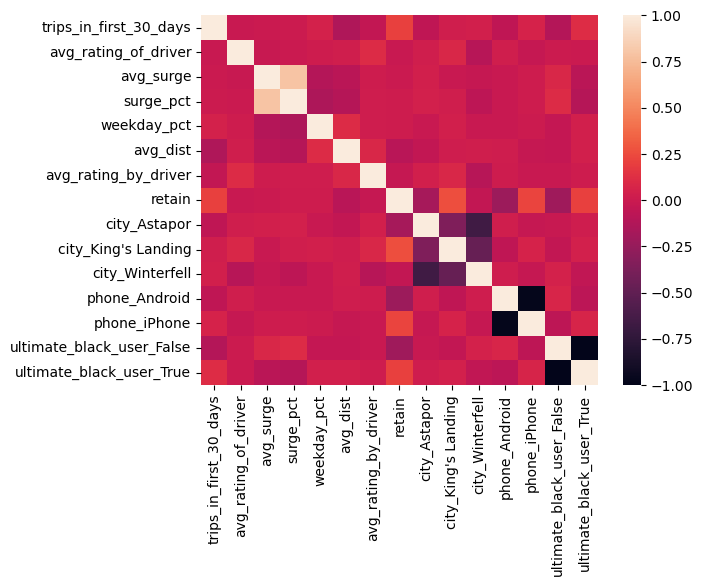

In [54]:
fig = plt.figure()
ax = plt.subplot(111)
corr = tourist.corr()
ax = sns.heatmap(corr)
plt.show()

In [55]:
corr['retain'].sort_values(ascending=False)

retain                       1.000000
city_King's Landing          0.262239
phone_iPhone                 0.225228
trips_in_first_30_days       0.210433
ultimate_black_user_True     0.205028
surge_pct                    0.011742
weekday_pct                  0.009617
avg_surge                   -0.003375
avg_rating_of_driver        -0.010775
avg_rating_by_driver        -0.026688
city_Winterfell             -0.046577
avg_dist                    -0.092847
city_Astapor                -0.174667
ultimate_black_user_False   -0.205028
phone_Android               -0.225446
Name: retain, dtype: float64

In [56]:
###So we see that 'retain' column is correlated with 'trips_in_first_30_days','ultimate_black_user', 'surge_pct'
### 'city_King's Landing', 'phone_iPhone' and 'weekday_pct'.

# 4. Preprocessing Data

In [57]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score, precision_score, recall_score, precision_recall_curve

In [58]:
## Split Data into Training and Test Sets
X = tourist.drop(['retain', 'last_trip_date'], axis=1)
y = tourist['retain']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21)

In [59]:
X.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
31425,1,2014-01-01,4.601559,1.00,0.0,100.0,4.31,5.0,0,0,1,0,1,1,0
10729,1,2014-01-01,3.000000,1.00,0.0,100.0,19.67,5.0,0,0,1,0,1,1,0
40336,1,2014-01-01,5.000000,1.00,0.0,100.0,5.98,5.0,0,0,1,0,1,1,0
34828,1,2014-01-01,5.000000,1.25,100.0,100.0,2.45,5.0,1,0,0,0,1,1,0
37295,1,2014-01-01,3.000000,1.00,0.0,100.0,0.77,5.0,0,0,1,0,1,1,0


In [60]:
y

31425    0
10729    0
40336    0
34828    0
37295    0
        ..
45126    1
38651    1
14473    1
22735    1
45357    1
Name: retain, Length: 49992, dtype: int64

# 5. Modelling

In [61]:
clf=RandomForestClassifier()

In [62]:
clf.fit(X_train, y_train)

TypeError: The DType <class 'numpy.dtype[datetime64]'> could not be promoted by <class 'numpy.dtype[float64]'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtype[int64]'>, <class 'numpy.dtype[datetime64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[float64]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>, <class 'numpy.dtype[uint8]'>)

In [ ]:
steps=[('imp-mean', SimpleImputer()),
       ('scaler', StandardScaler()),
       ('logreg', LogisticRegression())]

In [ ]:
pipeline=Pipeline(steps)

In [ ]:
params = {'logreg-solver': ['new-cg', 'saga', 'lbfgs'],
          'logreg-c': np.linspace(0.001, 1.0, 10)}

In [ ]:
tuning=GridSearchCV(pipeline, param_grid=params)

In [ ]:
tuning.fit(X_train, y_train)